# <center> Species Distribution Modeling for the Desert Night Lizard


## <center>  PySDMs Class Example

---

Author: [Daniel Furman](mailto:dryanfurman@gmail.com) | Jun 2018 - Jan 2021

Research question: How will climate change shift geographic overlaps between Desert Night Lizards and their Joshua tree habitats?

## The `PySDMs_example1.ipynb` Notebook's Focus:

---

**Overview**: This Jupyter notebook focuses on species distribution models for the Desert Night Lizard, an abundant lizard in SW United States deserts. The analysis includes several runs through the PySDMS workflow with different data partitions, background samples, and randomstate seeds (see data/). In example 1 the focus is on the Desert Night Lizard. See example 2 for the accompanying Joshua tree SDMs.

In [1]:
exec(open('/Users/danielfurman/Data_science_code/PySDMs-xantusia/src/PySDMs/_main.py').read())

## 1 | Model training over multiple random seeds/random background samples

--- 
 ### PyCaret Model Fitting: 
 --- 

The RandomState seed for this run is 190




### The Final Model:

     > catboost


### Geo-classification Interpolation 
 ---

Training features / target shape:

     > (1759, 12) (1759,)


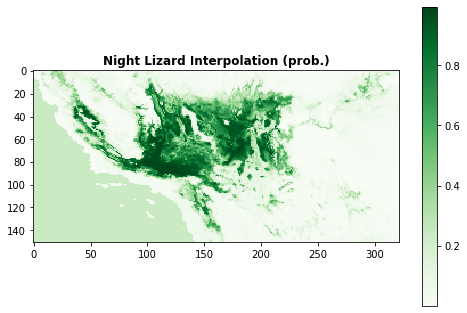

--- 
 ### PyCaret Model Fitting: 
 --- 

The RandomState seed for this run is 191




### The Final Model:

     > et


### Geo-classification Interpolation 
 ---

Training features / target shape:

     > (1761, 12) (1761,)


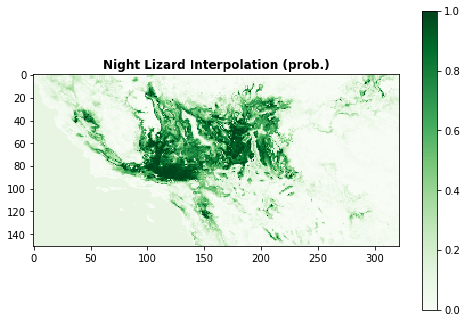

In [2]:
# Run PySDMs object over two random seeds and two different datasets
asc_input_dir = 'data/train-rasters-2.5m/'
env_train_input_dir = 'data/env_train/env_train_xv_'
random_seeds = np.arange(190, 192).tolist()

for seed in random_seeds:
    data = pd.read_csv('data/env_train/env_train_xv_'+str(seed) + '.csv')
    exp_name = 'xv_'+str(seed)
    # Initialization
    x_vigilis = PySDMs(data, seed, 'pa', 'xv_'+str(seed), normalize=False, silent=True)
    # Model Fitting with self.fit()
    learner = x_vigilis.fit()
    # Geo-classification with self.interpolate()
    x_vigilis.interpolate(asc_input_dir, env_train_input_dir, 'outputs/', seed)

## 2 | Model performance


### Model Performance Visualizations: 
 ---

F1 validation-set (30% held out) scores across a dozen run's most predictive models:

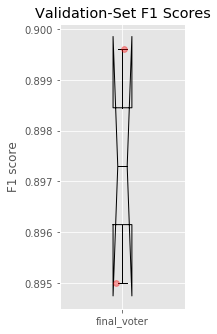

AUC scores for a single run, with k-fold CV across 100% of the data:

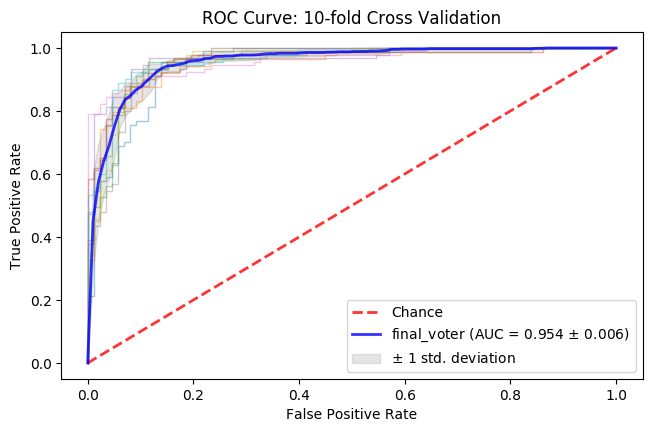

In [3]:
x_vigilis.validation_visuals(190, 192, AUC_seed=190)

## Appendix 1: Removing Correlated Features
---

Recursively selects de-correlated features for modeling below a Spearman's threshold, using the rank of feature importance scores.

In [4]:
from RecFeatureSelect import feature_selector

In [5]:
# load csv files for recursion function
covariance = pd.read_csv('data/raw/collinearity-xv-baseline.csv')
feature_importance = pd.read_csv('data/raw/maxent-jacknife.csv')
raw_data = pd.read_csv('data/raw/collinearity-raw_data.csv')
feature_selector(covariance, feature_importance, 0.85, raw_data)

Compared bclim16 or bclim19 
      >Dropped bclim16
Compared bclim13 or bclim19 
      >Dropped bclim13
Compared bclim1 or bclim10 
      >Dropped bclim10
Compared bclim14 or bclim17 
      >Dropped bclim17
Compared bclim12 or bclim19 
      >Dropped bclim19
Compared bclim1 or bclim5 
      >Dropped bclim5
Compared bclim1 or bclim11 
      >Dropped bclim1

Final set of variables: ['bclim11', 'bclim12', 'bclim14', 'bclim15', 'bclim18', 'bclim2', 'bclim3', 'bclim4', 'bclim6', 'bclim7', 'bclim8', 'bclim9']

Covariance matrix (with r <  0.85 ):

         bclim11   bclim12   bclim14   bclim15   bclim18    bclim2    bclim3  \
bclim11      1.0  0.362862  0.599233  0.150592  0.321581  0.157325  0.083554   
bclim12      0.0  1.000000  0.180278  0.520403  0.097076  0.312577  0.354639   
bclim14      0.0  0.000000  1.000000  0.634341  0.831801  0.358903  0.495674   
bclim15      0.0  0.000000  0.000000  1.000000  0.714498  0.018052  0.623828   
bclim18      0.0  0.000000  0.000000  0.000000  1.00

### Appendix 2 : Feature Descriptions
---

**Description for features is as follows :**

|Variable| Type | Definition|	Units|   
|:---  |:--- |:---| :---|
|BioClim11| Feature | Mean Temp of Coldest Quarter | $^o$C
|BioClim12| Feature | Annual Precipitation | mm
|BioClim14| Feature | Precip Driest Month| mm
|BioClim15| Feature | Precip Seasonality | coefficient of variation
|BioClim18| Feature | Precip Warmest Quarter | mm
|BioClim2| Feature | Diurnal Range | Mean of monthly (max temp - min temp)
|BioClim3| Feature | Isothermality | BIO2/BIO7 ×100
|BioClim4| Feature | Temperature Seasonality | standard deviation(C) ×100|
|BioClim6| Feature | Min Temp Coldest Month| $^o$C
|BioClim7| Feature | Temp Annual Range| $^o$C
|BioClim8| Feature | Mean Temp Wettest Quareter | $^o$C
|BioClim9| Feature | Mean Temp Driest Quareter | $^o$C
|Pa| Target| Binary class | presence / background

## Citations
---

1. <a target="_blank" rel="noopener noreferrer" href="https://cran.r-project.org/web/packages/dismo/vignettes/sdm.pdf">Species distribution modeling with R</a> (Hijmans and Elith, 2017)
2. Pyimpute's <a target="_blank" rel="noopener noreferrer" href="https://github.com/perrygeo/pyimpute/blob/master/README.md">README.md</a>
3. A study <a target="_blank" rel="noopener noreferrer" href="https://www.researchgate.net/publication/229149956_Selecting_Pseudo-Absences_for_Species_Distribution_Models_How_Where_and_How_Many">on generating pseudo absence points</a>  (Barbet-Massin et al., 2012)
4. A study <a target="_blank" rel="noopener noreferrer" href="https://www.nature.com/articles/s41598-018-25437-1
">on SDM transferability and pixel size</a>  (Manzoor et al., 2018)
5.  A study <a target="_blank" rel="noopener noreferrer" href="https://onlinelibrary.wiley.com/doi/full/10.1111/ddi.13161">on SDMs for invasive species</a>  (Lake et al., 2020)
6. A book <a target="_blank" rel="noopener noreferrer" href="https://www.amazon.com/Mapping-Species-Distributions-Biodiversity-Conservation/dp/0521700027
">on mapping SDMs </a>  (Franklin, 2009)
7. A more modern <a target="_blank" rel="noopener noreferrer" href="https://damariszurell.github.io/SDM-Intro/"> SDMs tutorial</a> (Zurell, 2020) 
8. A study <a target="_blank" rel="noopener noreferrer" href="https://onlinelibrary.wiley.com/doi/full/10.1111/j.1600-0587.2012.07348.x">on collinearity among model variables</a> (C. F. Dormann et al., 2012) 

## Data Citations
---

1. GBIF.org (01 November 2020) GBIF Occurrence Download https://doi.org/10.15468/dl.ceutzd 
2. Fick, S.E. and R.J. Hijmans, 2017. WorldClim 2: new 1km spatial resolution climate surfaces for global land areas. International Journal of Climatology 37 (12): 4302-4315.

